In [52]:
from matplotlib import pyplot as plt
class FDM_1D_Heat:
    def __init__(self, node_val, nodes, length, left_bn, right_bn, delta_time, alpha,error):
        self.node_val = node_val
        self.nodes = nodes
        self.node_loc = []
        self.length = length
        self.left_bn = left_bn
        self.right_bn = right_bn
        self.node_val_old = node_val
        self.delta_time = delta_time
        self.alpha = alpha
        self.dx = 0
        self.error = error
        for i in range(self.nodes+1):
            self.node_val.append(0)
        
    def calculate_number_of_nodes(self):
        #divide the length with number of nodes+1
        self.dx = self.length/(self.nodes+1)
        
        #input the loction of the nodes
        x = 0
        for i in range(self.nodes+1):
            x += self.dx
            self.node_loc.append(x)

        #input the value of boundaries
        self.node_val[0] = self.left_bn
        self.node_val[self.nodes] = self.right_bn        
        
    
    def calculate_Dirichlet_Dirichlet_Heat_Conduction(self):
        #This method uses FTCS (Forward in Time Central in Space) scheme for solving the PDE
        #calculate only for the inside nodes, the boundary nodes can be skipped
        # BN IN IN IN IN IN IN IN BN   
        # *  *  *  *  *  *  *  *  *
        # BN = Boundary node, IN = Inner node
        #the details of calculation can be searched on the internet or CFD class. Keyword: FTCS, 1D heat equation
        
        error = 10000; #initial value must be a big number
        #this loop for is used for iteration
        while error > self.error:
            error = 0
            for i in range(self.nodes+1):
                if i == 0 or i == self.nodes :
                    continue
                else:
                    new_val = self.node_val[i] + ((self.alpha * self.delta_time / (self.dx**2)) * (self.node_val[i+1] - 2 * self.node_val[i] + self.node_val[i-1]))
                    error += abs(self.node_val[i] - new_val)
                    self.node_val[i] = new_val
    
    def plot_result(self):
        #This one is for plotting only
        plt.plot(self.node_loc, self.node_val)
        plt.xlabel("Nodes Location")
        plt.ylabel("Nodes Value [degree celcius]")
        plt.title('1D heat equation result')
        plt.show()
        

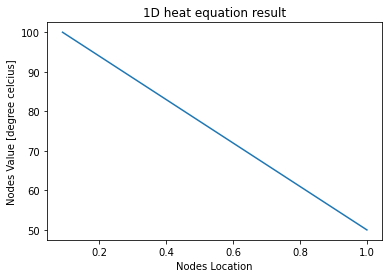

In [53]:
#=================(list kosong, banyak nodes, panjang batang, panas batang kiri, panas batang kanan, perubahan waktu, nilai alpha, error)
FDM =  FDM_1D_Heat([], 10, 1, 100, 50, 0.1, 0.01, 0.00001)
FDM.calculate_number_of_nodes()
FDM.calculate_Dirichlet_Dirichlet_Heat_Conduction()
FDM.plot_result()

In [ ]:
#Ini code CFD 1D heat equation yang menggunakan skema FTCS
#Resultnya oke karena udah lumayan lurus tuh grafiknya (error disetnya kecil wkwkw)
#Detailnya ya begitulah ya
#